# Ising 1D Solution by Metropolis Algorithm

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit




class Ising_1D_MEMC:
    def __init__(self):
        self.XSPINS = 64
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.S = 2*np.random.randint(2,size =self.XSPINS) - 1
        # set the number of iteration 
        self.STEPS = 5000
        

 
    def memc_1d(self,rede,beta):
        for i in range(self.XSPINS):
        
            a = np.random.randint(self.XSPINS)  
            s = rede[a]
            nb = rede[(a+1)%self.XSPINS] + rede[(a-1)%self.XSPINS] 
            dE = 2*nb*s
            if dE< 0:
                s*=-1
            elif np.random.random()< np.exp(-dE*beta):
                s*=-1
            rede[a] = s
        return rede
                
    def energy(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        
        for i in range(len(rede)):
            s = rede[i]
            nb = rede[(i+1)%self.XSPINS]  + rede[(i-1)%self.XSPINS] 
            energy += -nb*s
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
    def runObser_ME1(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.4, 3.28, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS) 
        for ii in range(nt):
            E1=M1=M2  = E2 =  0
           
            rede =self.S
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
            
            for i in range(self.STEPS):
                self.memc_1d(rede,beta)       #Monte Carlo Steps  
                Ene = self.energy(rede)     # Calcula a energia
                mag = self.Mag(rede)        # Calcula a magnetização
                
                E1 = E1 + Ene
                E2 = E2 + Ene*Ene
                M1 = M1 + mag
                M2 = M2 + mag*mag         #Mag*Mag
                           
           
            E[ii] = n1*E1
            M[ii] = n1*M1
            C[ii] = (n1*E2 - n2*E1*E1)*beta2
            X[ii] = (n1*M2 - n2*M1*M1)*beta
            
        f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

        sp =  f2.add_subplot(2, 2, 1 );
        plt.scatter(T, E, s=50, marker='o', color='blue')
        plt.xlabel("Temperature ", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 2 );
        plt.scatter(T, abs(M), s=50, marker='o', color='lime')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 3 );
        plt.scatter(T, C, s=50, marker='o', color='red')
        plt.xlabel("Temperature ", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f2.add_subplot(2, 2, 4 );
        plt.scatter(T, X, s=50, marker='o', color='magenta')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        tic = timeit.default_timer()
        print("Running Time:",tic-toc,"seconds")



# Ising 2D Solution by Metropolis Algorithm

In [10]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit
from __future__ import division





class Ising_2D_MEMC:
    def __init__(self):
        self.XSPINS = int(input('How many Xspins?'))
        self.YSPINS = int(input('How many Yspins?'))
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.S = 2*np.random.randint(2,size =(self.XSPINS,self.YSPINS)) - 1
        # set the number of iteration 
        self.STEPS = 2000

 
    def memc_2d(self,rede,beta):
        for j in range(self.XSPINS):
            for i in range(self.YSPINS):
                a = np.random.randint(self.XSPINS)
                b = np.random.randint(self.YSPINS)
                s = rede[a,b]
                nb = rede[(a+1)%self.XSPINS,b] + rede[(a-1)%self.XSPINS,b]+ rede[a,(b+1)%self.YSPINS] + rede[a,(b-1)%self.YSPINS] 
                dE = 2*nb*s
                if dE< 0:
                    s*=-1
                elif np.random.random()< np.exp(-dE*beta):
                    s*=-1
                rede[a,b] = s
        return rede
                
    def energy1(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        for j in range(len(rede)): 
            for i in range(len(rede)):
                s = rede[i,j]
                nb = rede[(i+1)%self.XSPINS,j] + rede[i,(j+1)%self.YSPINS] + rede[(i-1)%self.XSPINS,j] + rede[i,(j-1)%self.YSPINS]
                energy += -nb*s
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag1(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
    def runObser_ME(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.4, 3.28, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS*self.YSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS*self.YSPINS) 
        for ii in range(nt):
            E1=M1=M2  = E2 =  0
           
            rede =self.S
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
            
            for i in range(self.STEPS):
                self.memc_2d(rede,beta)       #Monte Carlo Steps  
                Ene = self.energy1(rede)     # Calcula a energia
                mag = self.Mag1(rede)        # Calcula a magnetização
                
                E1 = E1 + Ene
                E2 = E2 + Ene*Ene
                M1 = M1 + mag
                M2 = M2 + mag*mag         #Mag*Mag
                           
           
            E[ii] = n1*E1
            M[ii] = n1*M1
            C[ii] = (n1*E2 - n2*E1*E1)*beta2
            X[ii] = (n1*M2 - n2*M1*M1)*beta
            
        f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

        sp =  f2.add_subplot(2, 2, 1 );
        plt.scatter(T, E, s=50, marker='o', color='blue')
        plt.xlabel("Temperature ", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 2 );
        plt.scatter(T, abs(M), s=50, marker='o', color='lime')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 3 );
        plt.scatter(T, C, s=50, marker='o', color='red')
        plt.xlabel("Temperature ", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f2.add_subplot(2, 2, 4 );
        plt.scatter(T, X, s=50, marker='o', color='magenta')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        tic = timeit.default_timer()
        print("Running Time:",(tic-toc)//60,"minutes")

    def Plot(self, n):
        # remove previous figure
        plt.clf()
        # plot color map
        plt.imshow(self.S, cmap=plt.cm.PiYG, vmin=-1, vmax=1, animated=True)
        # add colorbar
        plt.colorbar(ticks=[-1, 1], orientation='vertical')
        # set pause interval time
        plt.pause(1.0e-6)
        # save figure as png format
        #plt.savefig('fig'+str(n)+'.png')

    def runGrid_Me(self):
        rede =self.S
        beta = 1/0.4
        
        # main loop start 
        for i in range(self.STEPS):
            # plot for especific iteration
            if i == 1:      self.Plot(i);
            if i == 50:       self.Plot(i);
            if i == 100:      self.Plot(i);
            if i == 1000:     self.Plot(i);
            if i == 2000:    self.Plot(i);
            
            # flip 
            self.memc_2d(rede,beta)



# Ising 2D Solution by Wolff Algorithm

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
import timeit

class IsingWolff:
    def __init__(self):
        """Initialization of de Lattice"""
        # set the number of spins in x-direrection, y-direction
        self.XSPINS = int(input('How many Xspins?'))
        self.YSPINS = int(input('How many Yspins?'))
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.S = 2*np.random.randint(2,size =(self.XSPINS,self.YSPINS)) - 1
        # set the number of iteration 
        self.STEPS = 5000
        # set tuple (i, j) neighbor
        self.NEIGHBOR = {}
        for i in range(self.XSPINS):
            for j in range(self.YSPINS):
                self.NEIGHBOR[(i, j)] = [((i+1)%self.XSPINS, j), ((i-1)%self.XSPINS, j), (i, (j+1)%self.YSPINS), (i, (j-1)%self.YSPINS)]

   

    def Cluster_Flip(self,rede, p):
        """Function responsable for define and flip the Cluster one time"""
        # set random coordinate (i, j)
        coord = (np.random.randint(self.XSPINS), np.random.randint(self.YSPINS))
        # set pocket
        pocket = [coord]
        # set cluster
        cluster = [coord]
        # search pocket while pocket is not empty
        while pocket != []:
            # choose random tuple from pocket
            l = random.choice(pocket)
            # for loop for neightborhood
            for m in self.NEIGHBOR[l]:
                # if spins are parallel & (i, j) is not in cluster and r < p, add to pocket & cluster
                if rede[m[0]][m[1]] == rede[l[0]][l[1]]:
                    if m not in cluster:
                        if np.random.rand() < p:
                            pocket.append(m)
                            cluster.append(m)
            # remove choosen (i, j) from pocket list
            pocket.remove(l)
        # flip spin including cluster
        for l in cluster:
            rede[l[0]][l[1]] *= -1
        
        return rede
        
       

    def Plot_Spin(self, n):
        # remove previous figure
        plt.clf()
        # plot color map
        plt.imshow(self.S, cmap=plt.cm.PiYG, vmin=-1, vmax=1, animated=True)
        # add colorbar
        plt.colorbar(ticks=[-1, 1], orientation='vertical')
        # set pause interval time
        plt.pause(1.0e-6)
        # save figure as png format
        #plt.savefig('fig'+str(n)+'.png')

    def runGrid_Wolff(self):
        # set cluster flip probability
        rede =self.S
        p = 1.0 - np.exp(-2.0*self.J*1/1.9)
        
        # main loop start 
        for i in range(self.STEPS):
            # plot for especific iteration
            if i == 1:      self.Plot_Spin(i);
            if i == 100:       self.Plot_Spin(i);
            if i == 400:      self.Plot_Spin(i);
            if i == 1000:     self.Plot_Spin(i);
            if i == 4000:    self.Plot_Spin(i);
            
            # flip cluster
            self.Cluster_Flip(rede,p)
            
            
    def energy2(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        for j in range(len(rede)): 
            for i in range(len(rede)):
                s = rede[i,j]
                nb = rede[(i+1)%self.XSPINS,j] + rede[i,(j+1)%self.YSPINS] + rede[(i-1)%self.XSPINS,j] + rede[i,(j-1)%self.YSPINS]
                energy += -nb*s
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag2(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
        
    def runObser_Wolff(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.4, 3.28, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS*self.YSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS*self.YSPINS) 
        for ii in range(nt):
            E1  = E2 =  0
            M1 = []
            M2 = []
            rede =self.S
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
            
            for i in range(self.STEPS):
                self.Cluster_Flip(rede,p)       #Monte Carlo Steps  
                Ene = self.energy2(rede)     # Calcula a energia
                mag = self.Mag2(rede)        # Calcula a magnetização
                
                E1 = E1 + Ene
                E2 = E2 + Ene*Ene
                M1.append(abs(mag))
                M2.append(mag*mag)        #Mag*Mag
                           
           
            E[ii] = n1*E1
            M[ii] = n1*np.sum(M1)
            C[ii] = (n1*E2 - n2*E1*E1)*beta2
            X[ii] = (n1*np.sum(M2) - n2*np.sum(M1)*np.sum(M1))*beta
            
        f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

        sp =  f2.add_subplot(2, 2, 1 );
        plt.scatter(T, E, s=50, marker='o', color='blue')
        plt.xlabel("Temperature ", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 2 );
        plt.scatter(T, abs(M), s=50, marker='o', color='lime')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 3 );
        plt.scatter(T, C, s=50, marker='o', color='red')
        plt.xlabel("Temperature ", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f2.add_subplot(2, 2, 4 );
        plt.scatter(T, X, s=50, marker='o', color='magenta')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        tic = timeit.default_timer()
        print("Running Time:",(tic-toc)//60,"minutes")


  

# Ising XY Metropolis algorithm

In [3]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit
from __future__ import division





class Ising_XY:
    def __init__(self):
        self.XSPINS = int(input('How many Xspins?'))
        self.YSPINS = int(input('How many Yspins?'))
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.theta = 2*np.pi*np.random.rand(self.XSPINS,self.YSPINS)
        # set the number of iteration 
        self.STEPS = 5000
        self.U = np.cos(self.theta)
        self.V = np.sin(self.theta)
        self.NEIGHBOR = {}
        for i in range(self.XSPINS):
            for j in range(self.YSPINS):
                self.NEIGHBOR[(i, j)] = [((i+1)%self.XSPINS, j), ((i-1)%self.XSPINS, j), (i, (j+1)%self.YSPINS), (i, (j-1)%self.YSPINS)]


    def memc_xy(self,rede,beta):
        for j in range(self.XSPINS):
            for i in range(self.YSPINS):
                a = np.random.randint(self.XSPINS)
                b = np.random.randint(self.YSPINS)
                theta_i = rede[a,b] #angulo da rede iniciada
                energy_i = -np.cos(theta_i-rede[(a+1)%self.XSPINS,b]) -np.cos(theta_i-rede[(a-1)%self.XSPINS,b])-np.cos(theta_i- rede[a,(b+1)%self.YSPINS]) -np.cos(theta_i -rede[a,(b-1)%self.YSPINS]) #energia do angulo inicial
                dtheta =2*np.pi*np.random.rand() #dtheta random
                theta_temp = abs(theta_i -dtheta) #angulo temporario
                energy_f = -np.cos(theta_temp-rede[(a+1)%self.XSPINS,b]) -np.cos(theta_temp-rede[(a-1)%self.XSPINS,b])-np.cos(theta_temp- rede[a,(b+1)%self.YSPINS]) -np.cos(theta_temp -rede[a,(b-1)%self.YSPINS])#energia final do angulo temporario
                dE = energy_f- energy_i
                
                #metropolis condition
            
                if dE< 0:
                    theta_i= theta_temp
                elif np.random.random()< np.exp(-dE*beta):
                    theta_i=theta_temp
                rede[a,b] = theta_i
               
        return rede
    
    
        
        
    def energy_(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        for j in range(len(rede)): 
            for i in range(len(rede)):
                theta = rede[i,j]
                energy += -np.cos(theta-rede[(i+1)%self.XSPINS,j]) -np.cos(theta-rede[(i-1)%self.XSPINS,j])-np.cos(theta- rede[i,(j+1)%self.YSPINS]) -np.cos(theta -rede[i,(j-1)%self.YSPINS])
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag4(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
    def runObser_XY(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.8, 2, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS*self.YSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS*self.YSPINS) 
        for ii in range(nt):
            E1=M1=M2  = E2 =  0
           
            rede =self.theta
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
            
            for i in range(self.STEPS):
                self.memc_xy(rede,beta)       #Monte Carlo Steps  
                Ene = self.energy_(rede)     # Calcula a energia
               # mag = self.Mag4(rede)        # Calcula a magnetização
                
                E1 = E1 + Ene
                E2 = E2 + Ene*Ene
                #M1 = M1 + mag
                #M2 = M2 + mag*mag         #Mag*Mag
                           
           
            E[ii] = n1*E1
            #M[ii] = n1*M1
            C[ii] = (n1*E2 - n2*E1*E1)*beta2
           # X[ii] = (n1*M2 - n2*M1*M1)*beta
            
        f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

        sp =  f2.add_subplot(2, 2, 1 );
        plt.scatter(T, E, s=50, marker='o', color='blue')
        plt.xlabel("Temperature ", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 2 );
        plt.scatter(T, abs(M), s=50, marker='o', color='lime')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 3 );
        plt.scatter(T, C, s=50, marker='o', color='red')
        plt.xlabel("Temperature ", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f2.add_subplot(2, 2, 4 );
        plt.scatter(T, X, s=50, marker='o', color='magenta')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        tic = timeit.default_timer()
        print("Running Time:",(tic-toc)//60,"minutes")

    def Plot(self,rede, n):
         # remove previous figure
        #plt.clf()
        # plot color map
        #plt.imshow(self.theta, cmap=plt.cm.PiYG, vmin=0, vmax=6.2, animated=True)
        # add colorbar
        #plt.colorbar(ticks=[0,6.2], orientation='vertical')
        # set pause interval time
        #plt.pause(1.0e-6)
        # save figure as png format
        #plt.savefig('fig'+str(n)+'.png')
        X, Y = np.meshgrid(np.arange(0,self.XSPINS ),np.arange(0, self.YSPINS))
        u=np.cos(rede)
        v=np.sin(rede)
        
        #plt.title('Arrows scale with plot width, not view')
        plt.quiver(X, Y,u, v,rede,pivot='mid',cmap=plt.cm.bwr, clim=[0,6])
        
        plt.axis('equal')
        plt.axis('off')
        cbar = plt.colorbar(ticks=[-3.14, 0, 3.14])
        plt.show()
        

    def runGrid_Me(self):
        # set cluster flip probability
        rede =self.theta
        beta = 1/0.5
        
        # main loop start 
        for i in range(self.STEPS):
            # plot for especific iteration
            if i == 1:       self.Plot(rede,i);
            if i == 3:       self.Plot(rede,i);
            if i == 10:      self.Plot(rede,i);
            if i == 30:     self.Plot(rede,i);
            if i == 4000:    self.Plot(rede,i);
            
            # flip cluster
            self.memc_xy(rede,beta)
            

From now on we can compile all the codes and see what happens.

Choose How many temperature points in graphic40
Running Time: 130.6065201 seconds


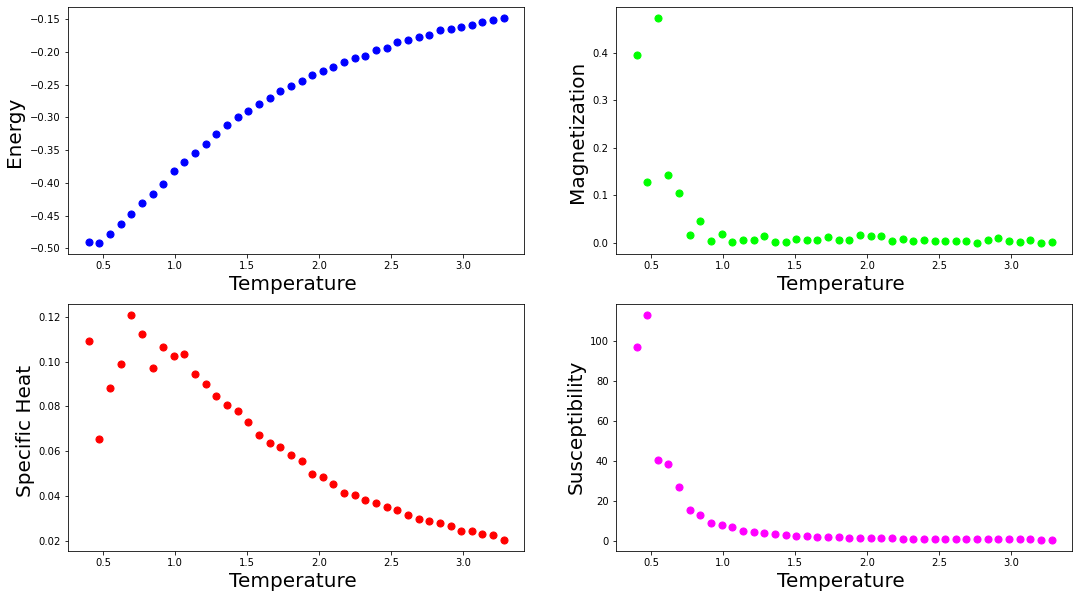

In [6]:
#Call Ising Metropolis 1D
A = Ising_1D_MEMC()
#run
A.runObser_ME1()

In [11]:
#Call Ising Metropolis 2D
IME =Ising_2D_MEMC()
#run 
IME.runObser_ME()

How many Xspins?64
How many Yspins?64


KeyboardInterrupt: Interrupted by user

How many Xspins?64
How many Yspins?64


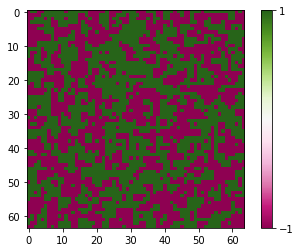

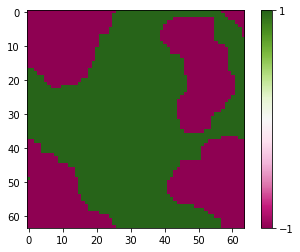

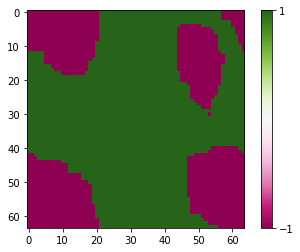

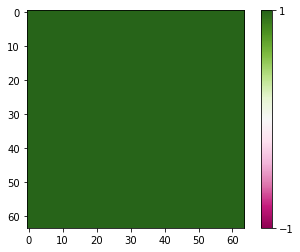

In [12]:
#Call Ising Metropolis 2D
IME1 =Ising_2D_MEMC()
#run
IME1.runGrid_Me()

In [3]:
#Call Wolff
IW = IsingWolff()
#run
IW.runObser_Wolff()

How many Xspins?20
How many Yspins?20


How many Xspins?100
How many Yspins?100


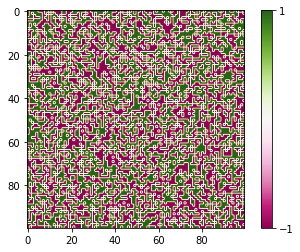

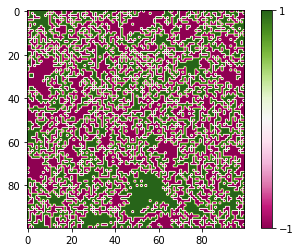

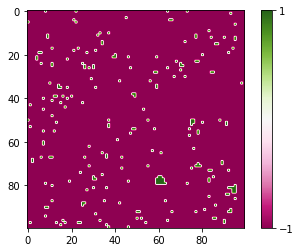

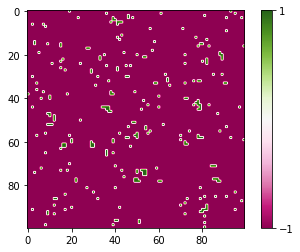

KeyboardInterrupt: 

In [7]:
#run snapshots for a given temperature
IW1 = IsingWolff()
IW1.runGrid_Wolff()

[Text(1, 0, '\\pi'), Text(1, 0, '0'), Text(1, 0, '-\\pi')]

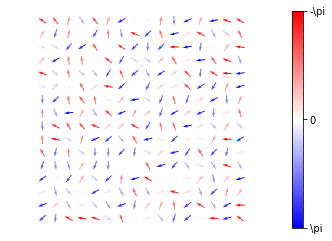

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
###################
function colorposneg
% colorposneg
% Use colormap which shows negative values green & blue, positive values yellow & red, zero white
caxis('auto');
C = caxis;
C2 = max(C(2),0);
C1 = min(C(1),0);
R = max(-C1,C2);
caxis([-R,R])
q = (C2-C1)/(2*R);
colormap(posneg(round(100/q)))

%%%%%%%%
function J = posneg(m)
%     colormap similar to jet, but with white instead of green in the center
if nargin < 1
   m = size(get(gcf,'colormap'),1);
end
x = linspace(-2.5,2.5,m)';        % consider x in [-2.5,2.5]
f = @(x) max(0,min(1,2-abs(x)));  % function for green
J = [f(x-1),f(x),f(x+1)];

#################
function ezpcolor(f,ra)
% ezpcolor(f,[x1 x2 y1 y2])
% pseudocolor plot of function f for x in [x1,x2], y in [y1,y2]
% f is symboic expression of x,y

N = 50;
xval = linspace(ra(1),ra(2),N);
yval = linspace(ra(3),ra(4),N);
[xg,yg] = meshgrid(xval,yval);       % values x,y on grid
ff = inline(vectorize(f),'x','y');
fg = ff(xg,yg);                      % values of f on this grid
pcolor(xg,yg,fg)
axis equal; shading interp

set(gcf,'Renderer','painters')

###################
function vectorfield(F,xval,yval)
% vectorfield([F1,F2],a:dx:b,c:dy:d)
% Plot 2D vectorfield [F1,F2] for 
% using x-values from a to b with spacing of dx
%       y-values from c to d with spacing of dy

[xg,yg] = meshgrid(xval,yval);             % values x,y on a grid
F1f = inline(vectorize(F(1)),'x','y');
F2f = inline(vectorize(F(2)),'x','y');
F1g = F1f(xg,yg);   % values of F1 on this grid
F2g = F2f(xg,yg);   % values of F1 on this grid
quiver(xg,yg,F1g,F2g,'k')
axis equal; axis tight


L = 16
S = (np.random.rand(L, L)-0.5)*2*np.pi
X, Y = np.mgrid[0:L, 0:L]
U = np.cos(S )
V = np.sin(S )
plt.quiver(X,Y,U,V,S,pivot='mid',cmap=plt.cm.bwr, clim=[-3.15,3.15])
plt.axis('equal')
plt.axis('off')
cbar = plt.colorbar(ticks=[-3.14, 0, 3.14])
cbar.ax.set_yticklabels([r"\pi", r"0", r"-\pi"])

In [10]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit
from __future__ import division





class Ising_XY:
    def __init__(self):
        self.XSPINS = int(input('How many Xspins?'))
        self.YSPINS = int(input('How many Yspins?'))
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.theta = 2*np.pi*np.random.rand(self.XSPINS,self.YSPINS)
        # set the number of iteration 
        self.STEPS = 5000
        self.U = np.cos(self.theta)
        self.V = np.sin(self.theta)
        self.NEIGHBOR = {}
        for i in range(self.XSPINS):
            for j in range(self.YSPINS):
                self.NEIGHBOR[(i, j)] = [((i+1)%self.XSPINS, j), ((i-1)%self.XSPINS, j), (i, (j+1)%self.YSPINS), (i, (j-1)%self.YSPINS)]


    def memc_xy(self,rede,beta):
        for j in range(self.XSPINS):
            for i in range(self.YSPINS):
                a = np.random.randint(self.XSPINS)
                b = np.random.randint(self.YSPINS)
                theta_i = rede[a,b] #angulo da rede iniciada
                energy_i = -np.cos(theta_i-rede[(a+1)%self.XSPINS,b]) -np.cos(theta_i-rede[(a-1)%self.XSPINS,b])-np.cos(theta_i- rede[a,(b+1)%self.YSPINS]) -np.cos(theta_i -rede[a,(b-1)%self.YSPINS]) #energia do angulo inicial
                dtheta =2*np.pi*np.random.rand() #dtheta random
                theta_temp = abs(theta_i -dtheta) #angulo temporario
                energy_f = -np.cos(theta_temp-rede[(a+1)%self.XSPINS,b]) -np.cos(theta_temp-rede[(a-1)%self.XSPINS,b])-np.cos(theta_temp- rede[a,(b+1)%self.YSPINS]) -np.cos(theta_temp -rede[a,(b-1)%self.YSPINS])#energia final do angulo temporario
                dE = energy_f- energy_i
                
                #metropolis condition
            
                if dE< 0:
                    theta_i= theta_temp
                elif np.random.random()< np.exp(-dE*beta):
                    theta_i=theta_temp
                rede[a,b] = theta_i
               
        return rede
    
    
        
        
    def energy_(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        for j in range(len(rede)): 
            for i in range(len(rede)):
                theta = rede[i,j]
                energy += -np.cos(theta-rede[(i+1)%self.XSPINS,j]) -np.cos(theta-rede[(i-1)%self.XSPINS,j])-np.cos(theta- rede[i,(j+1)%self.YSPINS]) -np.cos(theta -rede[i,(j-1)%self.YSPINS])
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag4(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
    def runObser_XY1(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.8, 2, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS*self.YSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS*self.YSPINS) 
        for ii in range(nt):
            E1=[]; E2 =  []
           
            rede =self.theta
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
            
            for i in range(self.STEPS):
                self.memc_xy(rede,beta)       #Monte Carlo Steps  
                Ene = self.energy_(rede)     # Calcula a energia
               # mag = self.Mag4(rede)        # Calcula a magnetização
                
                #E1 = E1 + Ene
                #E2 = E2 + Ene*Ene
                #M1 = M1 + mag
                #M2 = M2 + mag*mag         #Mag*Mag
                E1.append(Ene)
                E2.append(Ene*Ene)        #Mag*Mag
                           
           
            
            E[ii] = n1*np.sum(E1)
            
            C[ii] = (n1*np.sum(E2) - n2*np.sum(E1)*np.sum(E1))*beta2           
           
            #E[ii] = n1*E1
            #M[ii] = n1*M1
            #C[ii] = (n1*E2 - n2*E1*E1)*beta2
           # X[ii] = (n1*M2 - n2*M1*M1)*beta
            
        f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

        sp =  f2.add_subplot(2, 2, 1 );
        plt.scatter(T, E, s=50, marker='o', color='blue')
        plt.xlabel("Temperature ", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 2 );
        plt.scatter(T, abs(M), s=50, marker='o', color='lime')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 3 );
        plt.scatter(T, C, s=50, marker='o', color='red')
        plt.xlabel("Temperature ", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f2.add_subplot(2, 2, 4 );
        plt.scatter(T, X, s=50, marker='o', color='magenta')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        tic = timeit.default_timer()
        print("Running Time:",(tic-toc)//60,"minutes")

    def Plot(self,rede, n):
         # remove previous figure
        #plt.clf()
        # plot color map
        #plt.imshow(self.theta, cmap=plt.cm.PiYG, vmin=0, vmax=6.2, animated=True)
        # add colorbar
        #plt.colorbar(ticks=[0,6.2], orientation='vertical')
        # set pause interval time
        #plt.pause(1.0e-6)
        # save figure as png format
        #plt.savefig('fig'+str(n)+'.png')
        X, Y = np.meshgrid(np.arange(0,self.XSPINS ),np.arange(0, self.YSPINS))
        u=np.cos(rede)
        v=np.sin(rede)
        
        #plt.title('Arrows scale with plot width, not view')
        plt.quiver(X, Y,u, v,rede,pivot='mid',cmap=plt.cm.bwr, clim=[0,6])
        
        plt.axis('equal')
        plt.axis('off')
        cbar = plt.colorbar(ticks=[-3.14, 0, 3.14])
        plt.show()
        

    def runGrid_Me(self):
        # set cluster flip probability
        rede =self.theta
        beta = 1/1.5
        
        # main loop start 
        for i in range(self.STEPS):
            # plot for especific iteration
            if i == 1:       self.Plot(rede,i);
            if i == 3:       self.Plot(rede,i);
            if i == 10:      self.Plot(rede,i);
            if i == 30:     self.Plot(rede,i);
            if i == 4000:    self.Plot(rede,i);
            
            # flip cluster
            self.memc_xy(rede,beta)
            
    


How many Xspins?15
How many Yspins?15
Choose How many temperature points in graphic15
Running Time: 8.0 minutes


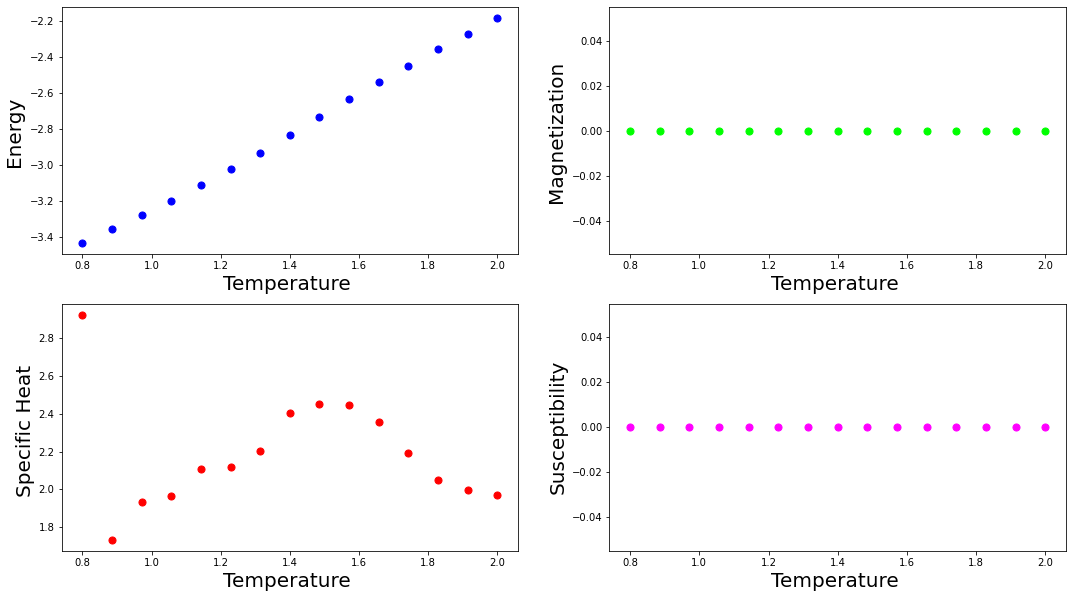

In [2]:
B = Ising_XY()
B.runObser_XY()

How many Xspins?20
How many Yspins?20


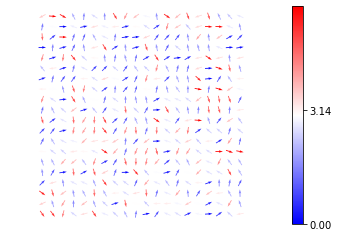

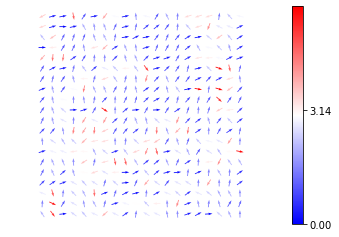

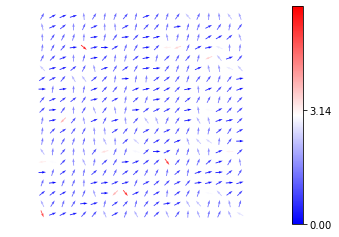

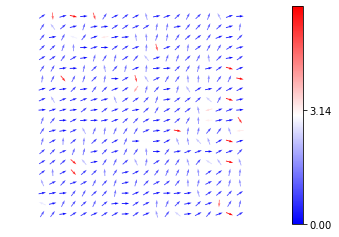

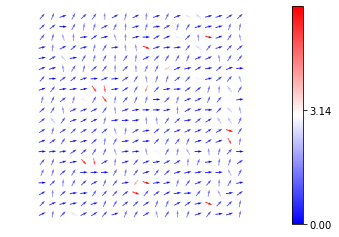

In [22]:
A = Ising_XY()
A.runGrid_Me()

In [9]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline  
import timeit
from __future__ import division





class Ising_XY:
    def __init__(self):
        self.XSPINS = int(input('How many Xspins?'))
        self.YSPINS = int(input('How many Yspins?'))
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.theta = 2*np.pi*np.random.rand(self.XSPINS,self.YSPINS)
        # set the number of iteration 
        self.STEPS = 30
        self.U = np.cos(self.theta)
        self.V = np.sin(self.theta)
        self.NEIGHBOR = {}
        for i in range(self.XSPINS):
            for j in range(self.YSPINS):
                self.NEIGHBOR[(i, j)] = [((i+1)%self.XSPINS, j), ((i-1)%self.XSPINS, j), (i, (j+1)%self.YSPINS), (i, (j-1)%self.YSPINS)]


    def memc_xy(self,rede,beta):
        for j in range(self.XSPINS):
            for i in range(self.YSPINS):
                a = np.random.randint(self.XSPINS)
                b = np.random.randint(self.YSPINS)
                theta_i = rede[a,b] #angulo da rede iniciada
                energy_i = -np.cos(theta_i-rede[(a+1)%self.XSPINS,b]) -np.cos(theta_i-rede[(a-1)%self.XSPINS,b])-np.cos(theta_i- rede[a,(b+1)%self.YSPINS]) -np.cos(theta_i -rede[a,(b-1)%self.YSPINS]) #energia do angulo inicial
                dtheta =2*np.pi*np.random.rand() #dtheta random
                theta_temp = abs(theta_i -dtheta) #angulo temporario
                energy_f = -np.cos(theta_temp-rede[(a+1)%self.XSPINS,b]) -np.cos(theta_temp-rede[(a-1)%self.XSPINS,b])-np.cos(theta_temp- rede[a,(b+1)%self.YSPINS]) -np.cos(theta_temp -rede[a,(b-1)%self.YSPINS])#energia final do angulo temporario
                dE = energy_f- energy_i
                
                #metropolis condition
            
                if dE< 0:
                    theta_i= theta_temp
                elif np.random.random()< np.exp(-dE*beta):
                    theta_i=theta_temp
                rede[a,b] = theta_i
               
        return rede
    
    
        
        
    def energy_(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        for j in range(len(rede)): 
            for i in range(len(rede)):
                s = rede[i,j]
                nb = rede[(i+1)%self.XSPINS,j] + rede[i,(j+1)%self.YSPINS] + rede[(i-1)%self.XSPINS,j] + rede[i,(j-1)%self.YSPINS]
                energy += -nb*s
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag1(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
    def runObser_ME(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.4, 3.28, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS*self.YSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS*self.YSPINS) 
        for ii in range(nt):
            E1=M1=M2  = E2 =  0
           
            rede =self.S
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
     
           
  

    def Plot(self,rede, n):
         # remove previous figure
        #plt.clf()
        # plot color map
        #plt.imshow(self.theta, cmap=plt.cm.PiYG, vmin=0, vmax=6.2, animated=True)
        # add colorbar
        #plt.colorbar(ticks=[0,6.2], orientation='vertical')
        # set pause interval time
        #plt.pause(1.0e-6)
        # save figure as png format
        #plt.savefig('fig'+str(n)+'.png')
        X, Y = np.meshgrid(np.arange(0,self.XSPINS ),np.arange(0, self.YSPINS))
        u=np.cos(rede)
        v=np.sin(rede)
        
        #plt.title('Arrows scale with plot width, not view')
        plt.quiver(X, Y,u, v,rede,pivot='mid',cmap=plt.cm.bwr, clim=[0,6])
        
        plt.axis('equal')
        plt.axis('off')
        cbar = plt.colorbar(ticks=[-3.14, 0, 3.14])
        plt.show()
        

    def runGrid_Me(self):
        # set cluster flip probability
        
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.4, 3.28, nt);  #Temperatura
        
        for ii in range(nt):
            
           
            rede =self.theta
            beta=1.0/T[ii];
        
        # main loop start 
            for i in range(self.STEPS):
                
            # plot for especific iteration
            
                if i == 5:       self.Plot(rede,i);
            #if i == 450:      self.Plot(rede,i);
            #if i == 1000:     self.Plot(rede,i);
            #if i == 4000:    self.Plot(rede,i);
            
            # flip cluster
                self.memc_xy(rede,beta)

How many Xspins?15
How many Yspins?15
Choose How many temperature points in graphic30


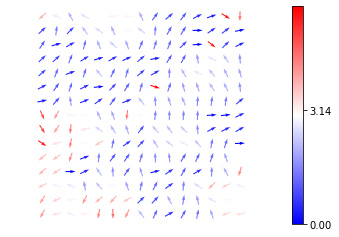

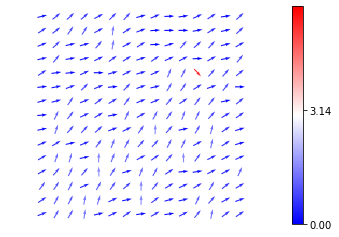

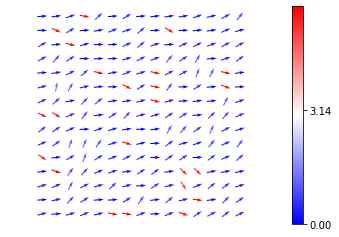

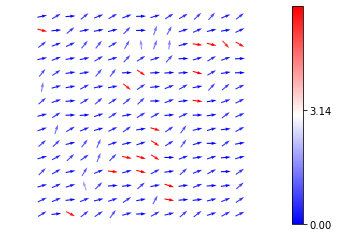

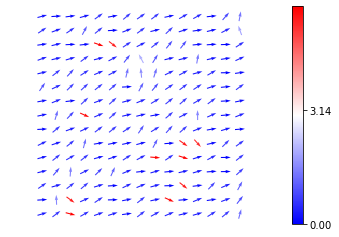

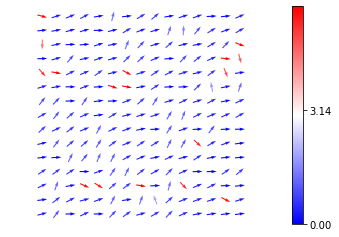

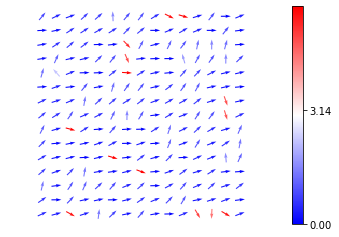

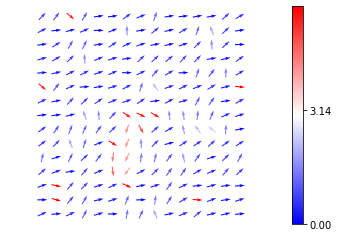

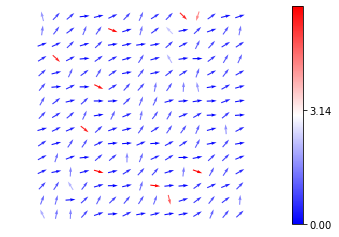

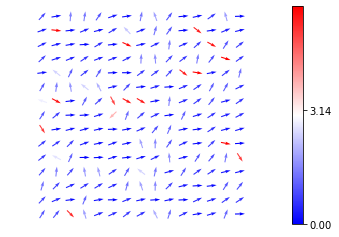

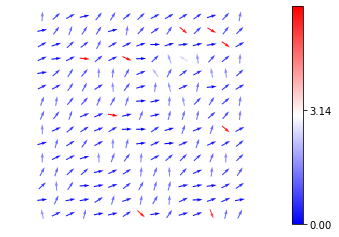

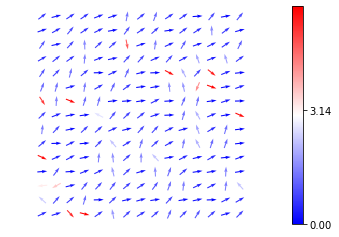

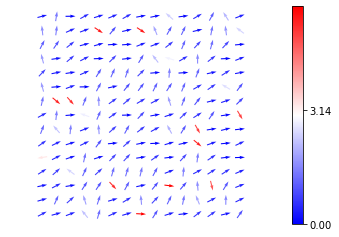

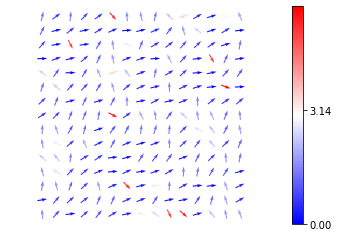

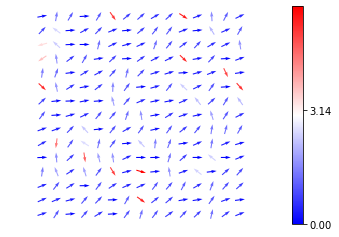

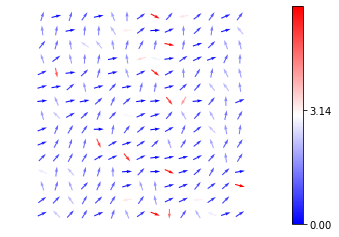

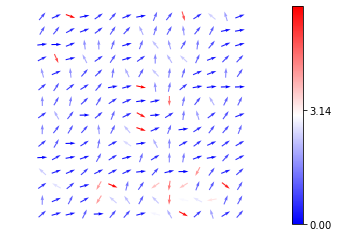

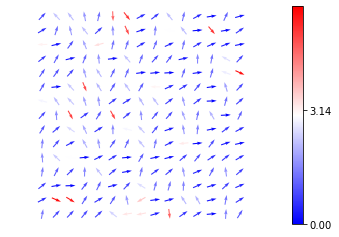

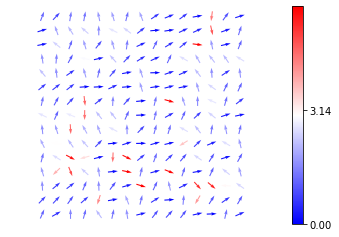

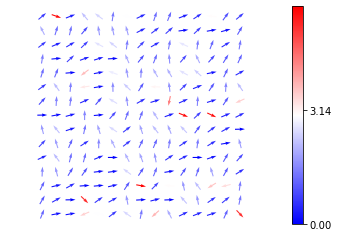

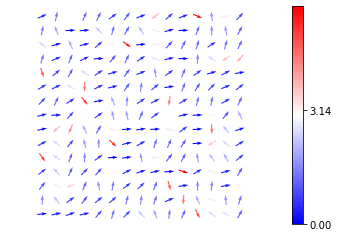

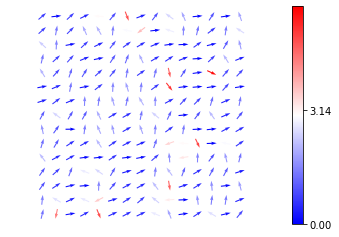

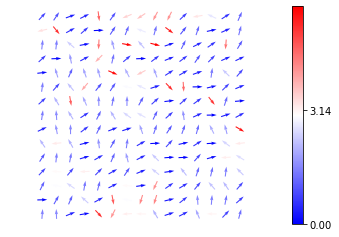

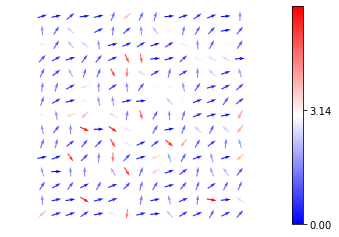

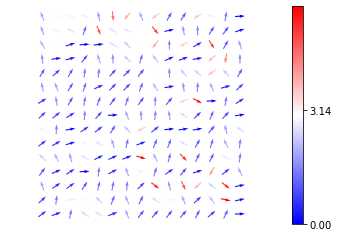

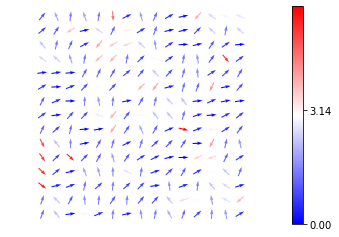

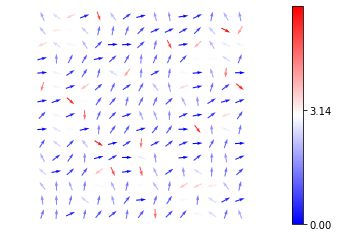

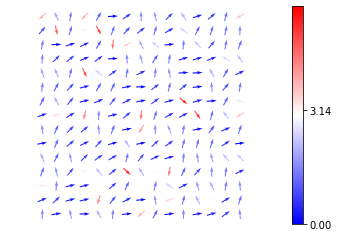

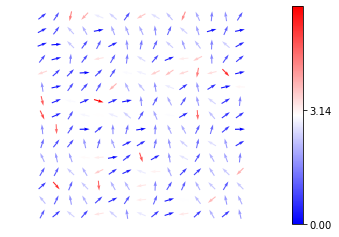

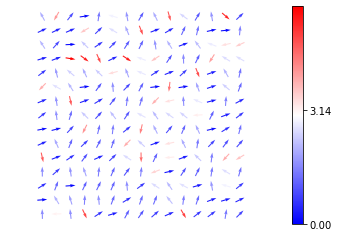

In [10]:
A = Ising_XY()
A.runGrid_Me()